<a href="https://colab.research.google.com/github/Sunayana921/Sunayana921-Data-Analyst/blob/main/Customer_churn_prediction_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-n

<ipython-input-1-3a6dfc1c28f7>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


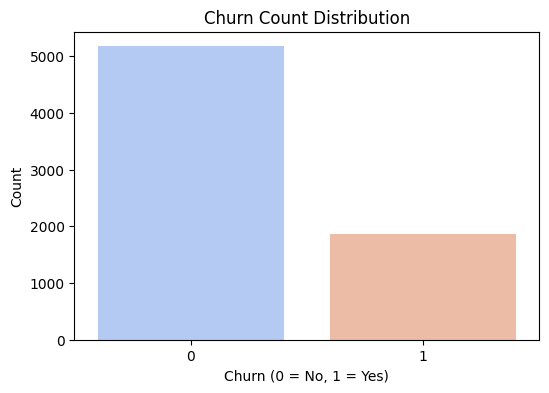

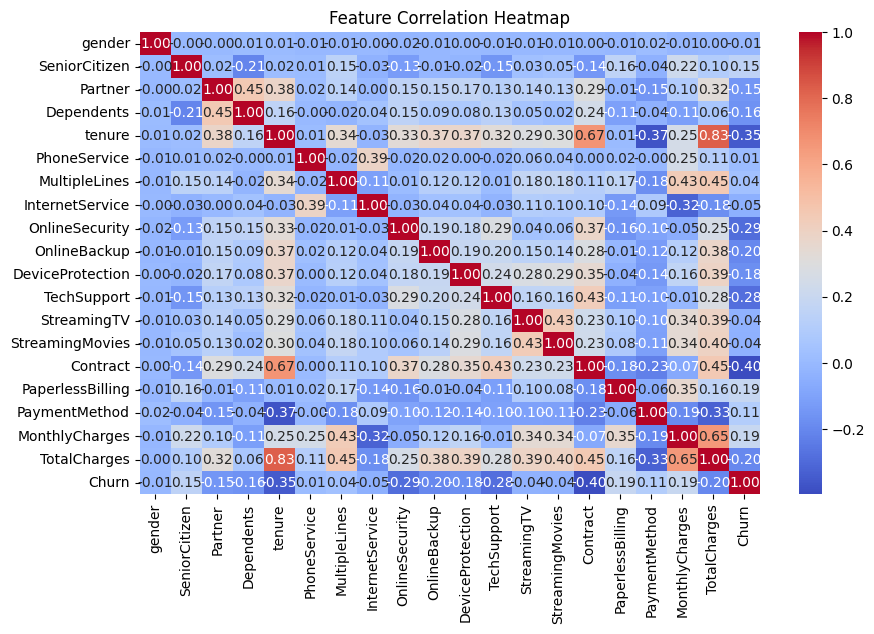


 Model Accuracy: 0.79

 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1036
           1       0.61      0.64      0.62       373

    accuracy                           0.79      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.79      0.80      1409



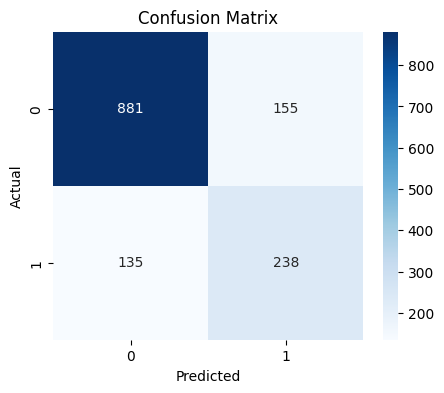

<ipython-input-1-3a6dfc1c28f7>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="coolwarm")


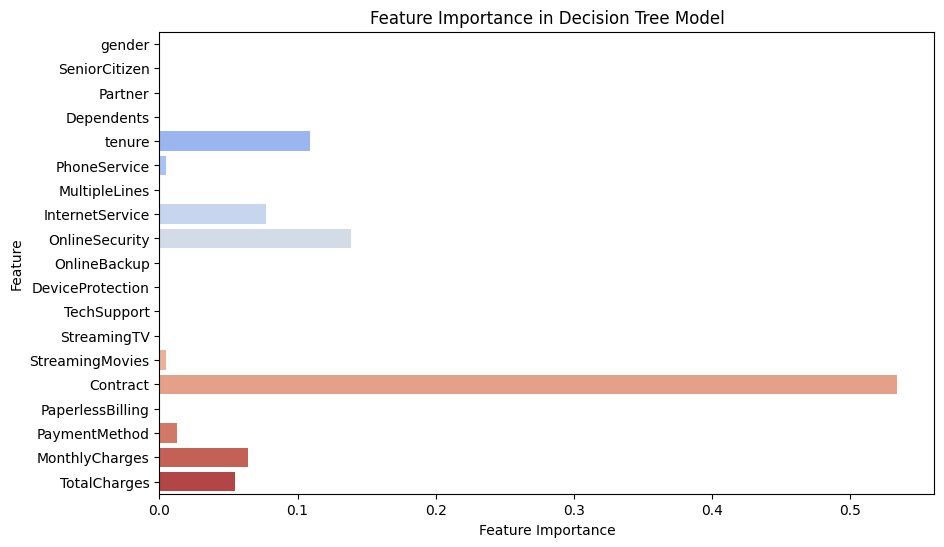

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#  Load the dataset
file_path = "customer_churn_telecom_services.csv"  # Adjust if needed
df = pd.read_csv(file_path)

#  Display basic information
print("Dataset Info:")
print(df.info())

# Display first few rows
print("\nFirst 5 Rows:")
print(df.head())

# Check missing values
print("\nMissing Values Count:")
print(df.isnull().sum())

#  Drop irrelevant columns (if any)
if "CustomerID" in df.columns:
    df = df.drop(columns=["CustomerID"])  # Customer ID is usually not useful for prediction

# Convert categorical variables into numeric using Label Encoding
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

#  Exploratory Data Analysis (EDA)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title("Churn Count Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Define Features (X) and Target (y)
X = df.drop(columns=['Churn'])
y = df['Churn']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Model
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\n Model Accuracy: {accuracy:.2f}")

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette="coolwarm")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Decision Tree Model")
plt.show()




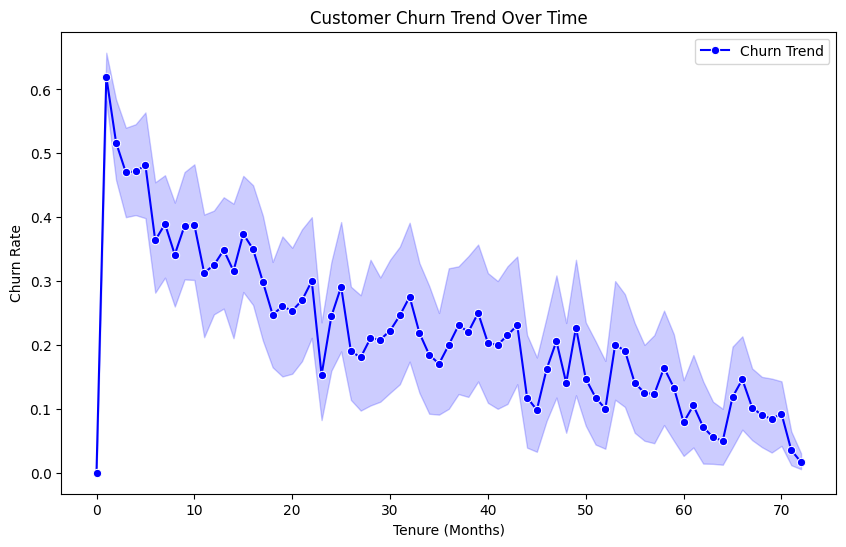

In [ ]:
# Example: Line chart for Churn rate over Tenure (adjust feature accordingly)
plt.figure(figsize=(10, 6))
# Check if 'tenure' column exists (case-insensitive)
if 'tenure' in df.columns.str.lower():
    tenure_col = df.columns[df.columns.str.lower() == 'tenure'][0] # Get the correct column name
    sns.lineplot(x=df[tenure_col], y=df["Churn"], marker="o", color="b", label="Churn Trend")
else:
    print("Warning: 'Tenure' column not found in the DataFrame. Please check the column name.")
plt.xlabel("Tenure (Months)")
plt.ylabel("Churn Rate")
plt.title("Customer Churn Trend Over Time")
plt.legend()
plt.show()

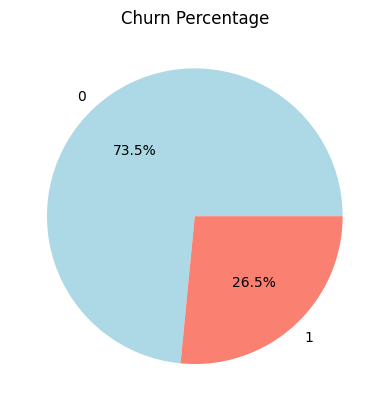

In [ ]:
df["Churn"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "salmon"])
plt.title("Churn Percentage")
plt.ylabel("")  # Hide y-label
plt.show()


<ipython-input-4-2cef99b33d92>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Churn"], y=df["MonthlyCharges"], palette="coolwarm")


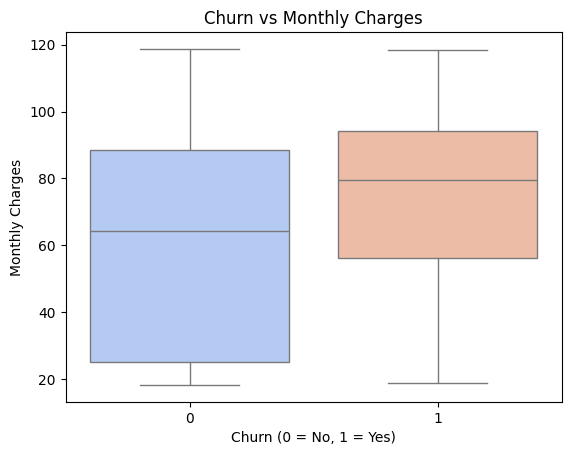

In [ ]:
sns.boxplot(x=df["Churn"], y=df["MonthlyCharges"], palette="coolwarm")
plt.title("Churn vs Monthly Charges")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Monthly Charges")
plt.show()